In [96]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["axes.formatter.use_mathtext"] = True 
sns.set(font="cmr10")
sns.set_theme(style="whitegrid", context="paper", font="cmr10")

def save_figure(name):
    plt.savefig(f"exports/{name}.pdf", format="pdf")

In [97]:
data = pd.read_csv("datasets/demographics_merged.csv")
data.head()

,Participant ID,[Participant] Gender,[Participant] Age,[Participant] Studies Level,[Participant] Reddit Usage,[Participant] Social Media Usage,[Participant] Fake News Ability,[Participant] Reddit As News Source,[Participant] Reddit Credibility Evaluation,Ethnicity simplified,Nationality
0,5c33da29221fad0001cc605a,Female,30,Undergraduate,5.0,5.0,4.0,Easy to confuse upvotes with credibility. Very...,"As above, I look at link and number of upvotes",White,United Kingdom
1,577a04dbadbc7500015d2475,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,White,United Kingdom
2,5bd3a8173043160001943d9b,Female,54,NaN,NaN,NaN,NaN,NaN,NaN,White,Australia
3,5cae09506d573900175d4727,Male,24,Graduate,5.0,5.0,4.0,I don't generally use it as news source but I ...,Usually I look at karma of the post then I rea...,White,Portugal
4,5d21f63e4c6155001b9199e1,Female,22,Undergraduate,5.0,4.0,4.0,"I like it, but we have to keep in mind that wh...","I can't until I open it up. But if I can't, I ...",White,Portugal


In [98]:
participant_id = "Participant ID"

age = "[Participant] Age"
gender = "[Participant] Gender"
nationality = "Nationality"
ethnicity = "Ethnicity simplified"

study_level = "[Participant] Studies Level"
reddit_usage = "[Participant] Reddit Usage"
social_usage = "[Participant] Social Media Usage"
fake_news_ability = "[Participant] Fake News Ability"
reddit_as_news = "[Participant] Reddit As News Source"
own_credibility_evaluation = "[Participant] Reddit Credibility Evaluation"

In [99]:
data[ethnicity].value_counts()

Ethnicity simplified
White    64
Black     2
Other     1
Asian     1
Name: count, dtype: int64

In [100]:
data[nationality].value_counts()

Nationality
United Kingdom    23
Poland             9
Italy              8
Portugal           7
Canada             3
Netherlands        3
New Zealand        2
South Africa       2
United States      2
Hungary            2
Australia          1
Albania            1
Mexico             1
Greece             1
Spain              1
Ireland            1
Slovenia           1
Name: count, dtype: int64

In [101]:
data[study_level].value_counts()

[Participant] Studies Level
Undergraduate     28
Graduate          14
Post-Secondary    12
Secondary         10
Doctoral           2
Name: count, dtype: int64

In [102]:
data[gender].value_counts()

[Participant] Gender
Female    43
Male      25
Name: count, dtype: int64

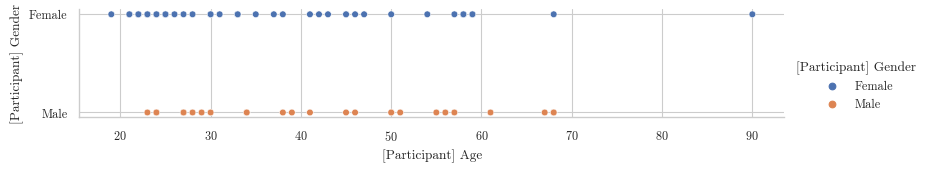

In [103]:
plot = sns.relplot(data=data[[age, gender]], x=age, y=gender, hue=gender, height=1.8, aspect=4.5)

save_figure("gender_age")

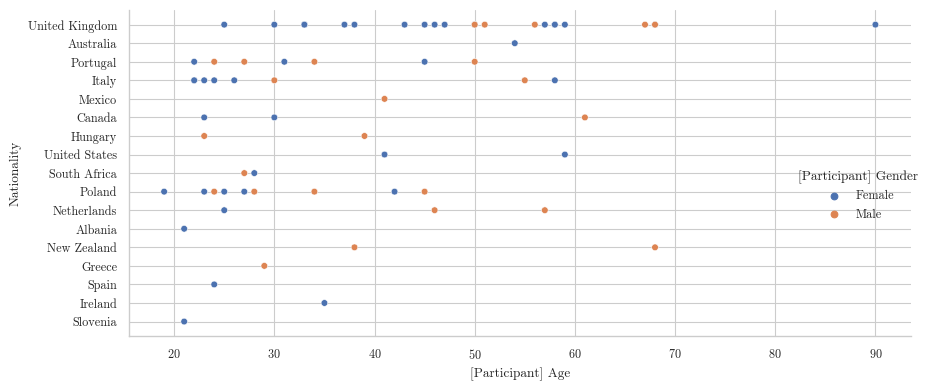

In [104]:
plot = sns.relplot(
    data=data[[nationality, age, gender]],
    x=age,
    y=nationality,
    hue=gender,
    height=4,
    aspect=2,
)
plt.tight_layout()
save_figure("nationalities_by_gender_and_age")

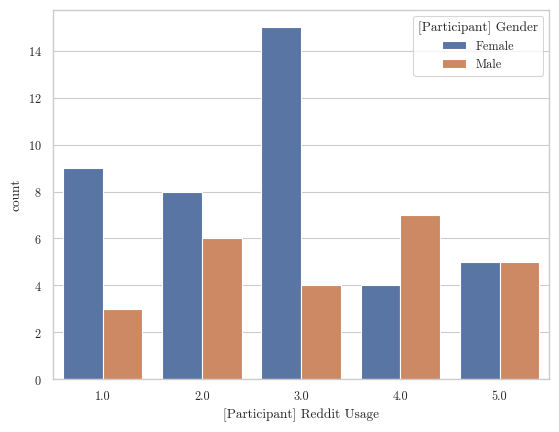

In [105]:
plot = sns.countplot(data=data[[reddit_usage, gender]], x=reddit_usage, hue=gender)

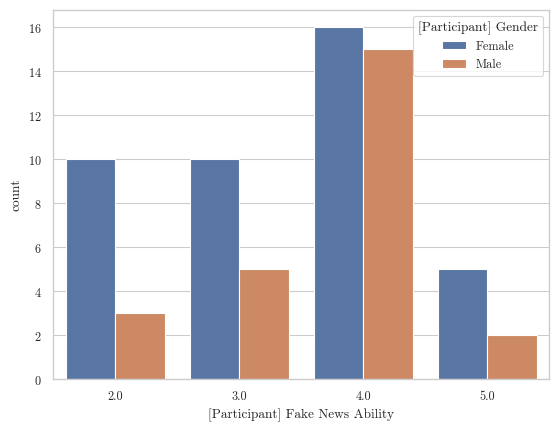

In [106]:
plot = sns.countplot(data=data[[fake_news_ability, gender]], x=fake_news_ability, hue=gender)

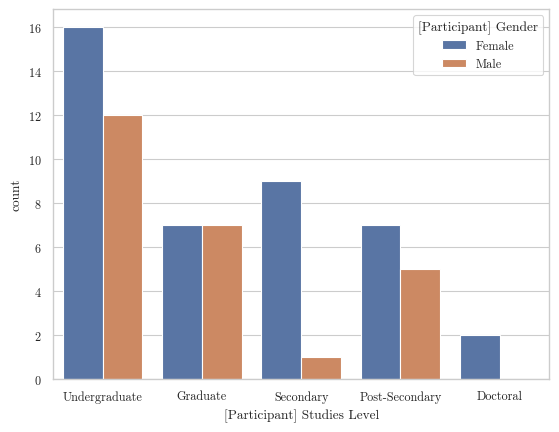

In [107]:
plot = sns.countplot(data=data[[study_level, gender]], x=study_level, hue=gender)

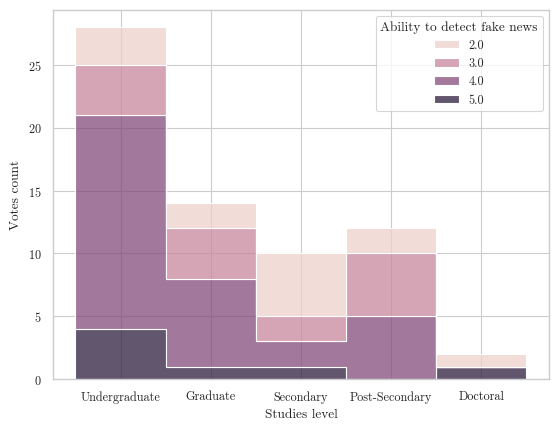

In [108]:
plot = sns.histplot(data, x=study_level, hue=fake_news_ability, multiple="stack", element="step")
plot.set_xlabel("Studies level")
plot.set_ylabel("Votes count")
plot.legend_.set_title("Ability to detect fake news")
save_figure("fake_news_ability_by_study_level")